# Hotel Booking Demand Analytics

## Oleh : Putra Hardi Ramadhan

[Sumber data Hotel Booking Demand](https://drive.google.com/drive/folders/17KIeOXK7eYGuzgpn_IljlUFcE4v96lSL) 

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Kesimpulan dan Rekomendasi Model
6. Kesimpulan dan Rekomendasi Bisnis
7. Import Model dengan Pickle

****

## **1. Business Problem Understanding**

**Context**

Dataset ini berisi informasi pemesanan untuk sebuah hotel yang berlokasi di Portugal. Informasi ini mencakup berbagai aspek seperti negara asal pelanggan, tipe reservasi, jumlah pembatalan sebelumnya, hingga permintaan khusus. Semua informasi pribadi telah dihapus untuk menjaga kerahasiaan data.

Hotel menghadapi tantangan dalam memahami pola perilaku pelanggan untuk meningkatkan pengelolaan reservasi dan pengalaman pelanggan. Dengan adanya dataset ini, kita dapat menggali pola-pola tersebut untuk memberikan wawasan yang dapat membantu meningkatkan efisiensi dan kualitas layanan hotel.

**Problem Statement**

Salah satu tantangan utama dalam industri perhotelan adalah memprediksi perilaku pelanggan terkait pembatalan, kebutuhan khusus, dan perubahan dalam reservasi. Memahami faktor-faktor yang memengaruhi hal tersebut sangat penting untuk meningkatkan kepuasan pelanggan, mengoptimalkan tingkat hunian hotel, serta mengurangi kerugian akibat pembatalan mendadak.

**Goals**

Tujuan dari analisis ini adalah:

1. Memahami pola pembatalan pemesanan: Mengidentifikasi faktor-faktor yang paling berpengaruh terhadap pembatalan.
2. Menganalisis permintaan pelanggan: Mengetahui pola terkait kebutuhan seperti ruang parkir atau permintaan khusus lainnya.
3. Memberikan wawasan strategis: Menghasilkan rekomendasi untuk meningkatkan pengelolaan reservasi, memaksimalkan tingkat hunian, dan mengurangi potensi kerugian akibat pembatalan.


**Analytic Approach**

Langkah-langkah analisis yang akan dilakukan meliputi:

1. Eksplorasi data untuk memahami distribusi dan pola dari masing-masing fitur.
2. Identifikasi korelasi antara variabel, terutama yang berhubungan dengan pembatalan dan permintaan pelanggan.
3. Membangun model prediktif untuk memprediksi kemungkinan pembatalan pemesanan.
4. Interpretasi hasil analisis dan penyusunan rekomendasi berbasis data.

**Metric Evaluation**

Metode evaluasi yang digunakan adalah:

1. Accuracy, Precision, dan Recall

- Accuracy: Mengukur seberapa tepat model dalam mengklasifikasikan data.
- Precision: Mengetahui seberapa relevan prediksi pembatalan.
- Recall: Mengetahui seberapa banyak kasus pembatalan yang teridentifikasi dengan benar.

2. F1-Score
Kombinasi rata-rata harmonis antara Precision dan Recall untuk memberikan keseimbangan evaluasi.


3. Confusion Matrix
Menampilkan jumlah prediksi benar (True Positive dan True Negative) serta salah (False Positive dan False Negative).


## 2. Data Understanding

Dataset ini terdiri dari 83.573 baris dan 11 kolom. Setiap baris merepresentasikan informasi terkait satu pemesanan, dengan berbagai atribut yang menjelaskan detail pemesanan seperti asal pelanggan, tipe reservasi, dan status pembatalan. Berikut adalah cuplikan data:

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
country|Object|Negara asal pelanggan.
market_segment|Object|Penunjukan segmen pasar.
previous_cancellations|Integer|Jumlah pemesanan sebelumnya yang dibatalkan oleh pelanggan sebelum pemesanan saat ini.
booking_changes|Integer|Jumlah perubahan yang dilakukan pada pemesanan sejak dimasukkan hingga saat check-in/batal.
deposit_type|Object|Indikasi apakah pelanggan melakukan deposit untuk menjamin pemesanan.
days_in_waiting_list|Integer|Jumlah hari pemesanan berada dalam daftar tunggu sebelum dikonfirmasi kepada pelanggan.
customer_type|Object|Tipe pemesanan (misalnya: Transient, Contract, Transient-Party).
reserved_room_type|Object|Kode jenis kamar yang dipesan. Kode digunakan untuk menjaga kerahasiaan.
required_car_parking_spaces|Integer|Jumlah ruang parkir mobil yang dibutuhkan oleh pelanggan.
total_of_special_requests|Integer|Jumlah permintaan khusus yang diajukan oleh pelanggan (misalnya: tempat tidur twin atau lantai tinggi).
is_canceled|Integer|Nilai yang menunjukkan apakah pemesanan dibatalkan (1) atau tidak (0).

<br>

In [93]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [94]:
#Load Dataset
df = pd.read_csv(r'C:\Users\putra\Desktop\Purwadhika\Capstone Project 3\data_hotel_booking_demand.csv')
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


#### Exploratory Data Analysis

In [95]:
# Info data
df.info()

# Statistik deskriptif
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


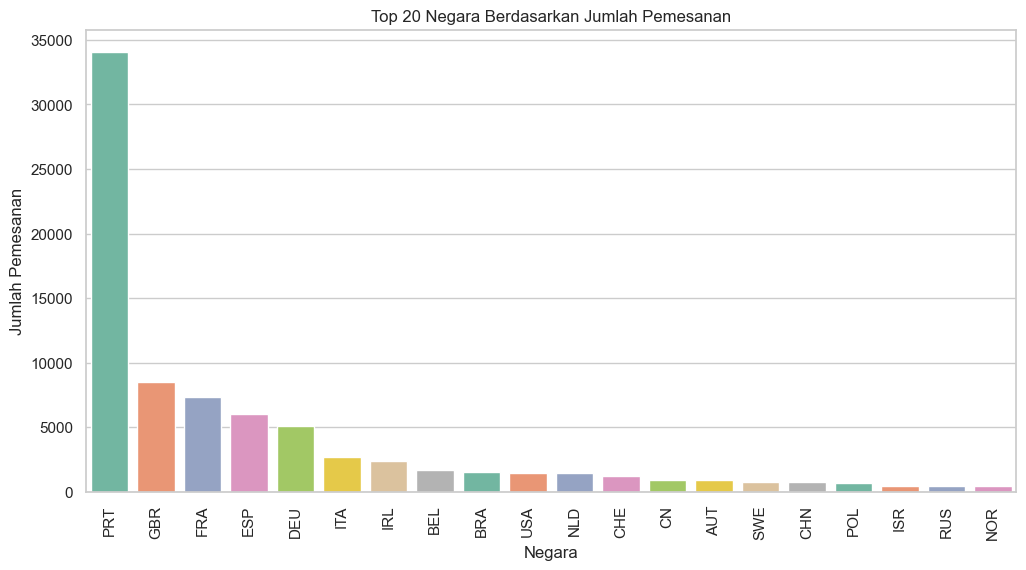

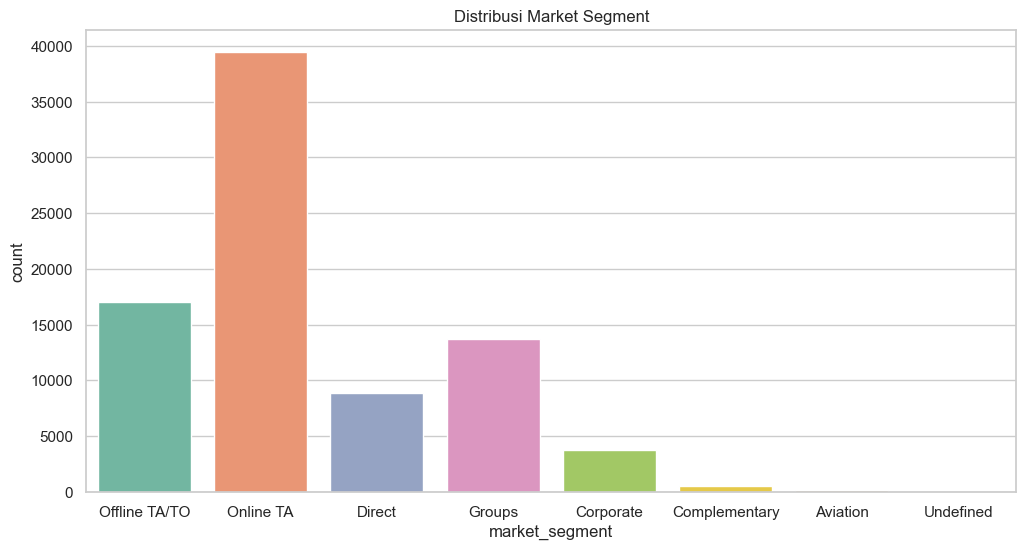

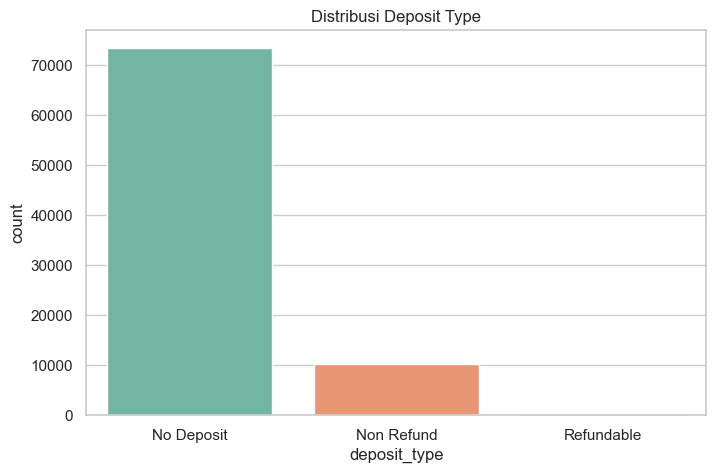

In [96]:
df.isnull().sum()

# Menghitung jumlah pemesanan berdasarkan negara
top_countries = df['country'].value_counts().head(20)

# Plot untuk top 20 negara
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='Set2')
plt.title('Top 20 Negara Berdasarkan Jumlah Pemesanan')
plt.xticks(rotation=90)
plt.xlabel('Negara')
plt.ylabel('Jumlah Pemesanan')
plt.show()


# Plot untuk 'market_segment'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='market_segment', palette='Set2')
plt.title('Distribusi Market Segment')
plt.show()

# Plot untuk 'deposit_type'
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='deposit_type', palette='Set2')
plt.title('Distribusi Deposit Type')
plt.show()



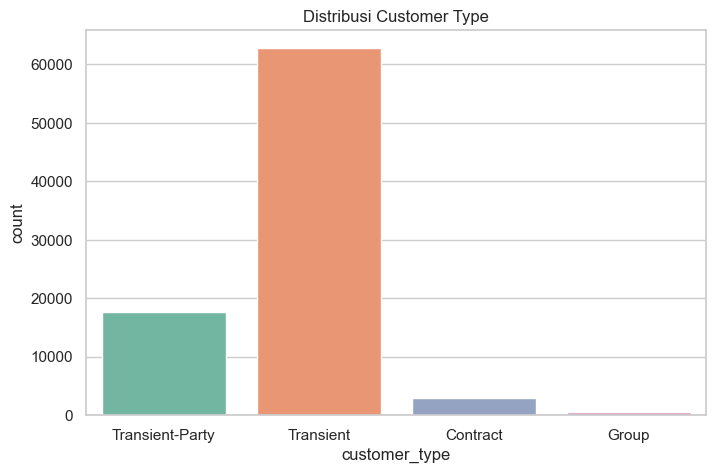

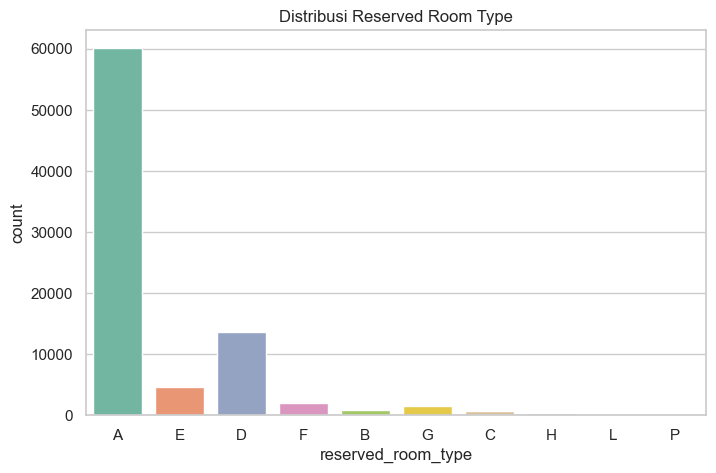

In [97]:

# Plot untuk 'customer_type'
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='customer_type', palette='Set2')
plt.title('Distribusi Customer Type')
plt.show()

# Plot untuk 'reserved_room_type'
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='reserved_room_type', palette='Set2')
plt.title('Distribusi Reserved Room Type')
plt.show()

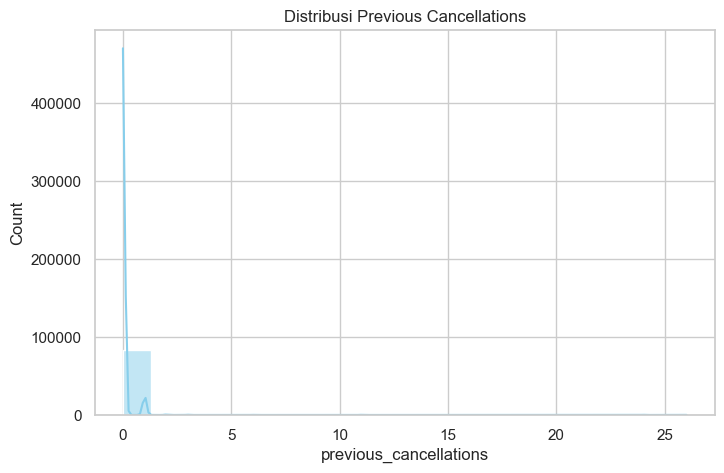

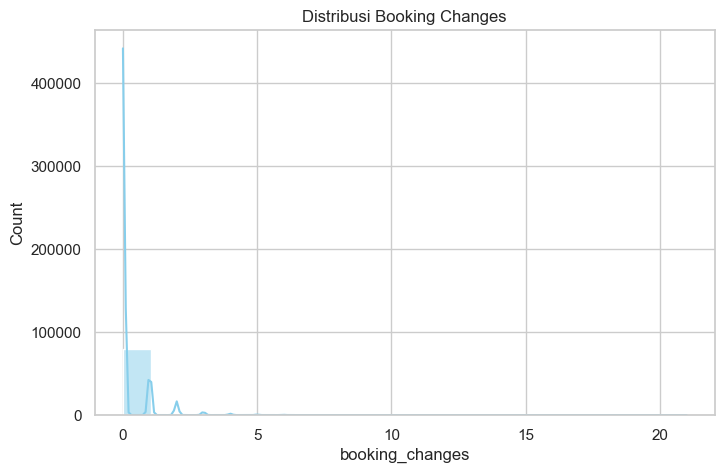

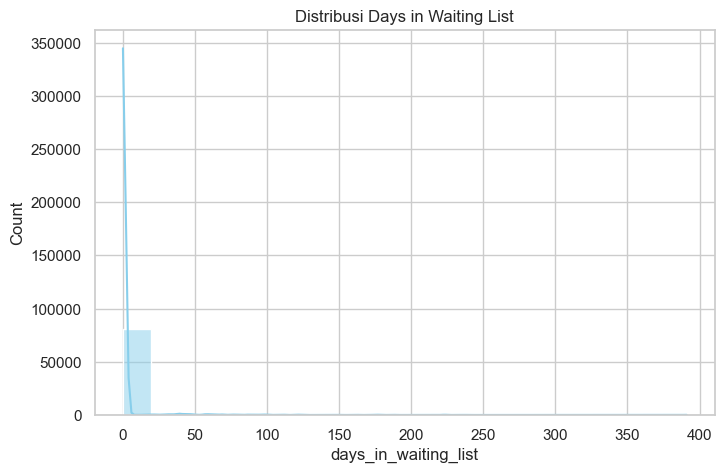

In [98]:
# Plot untuk 'previous_cancellations'
plt.figure(figsize=(8, 5))
sns.histplot(df['previous_cancellations'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Previous Cancellations')
plt.show()

# Plot untuk 'booking_changes'
plt.figure(figsize=(8, 5))
sns.histplot(df['booking_changes'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Booking Changes')
plt.show()

# Plot untuk 'days_in_waiting_list'
plt.figure(figsize=(8, 5))
sns.histplot(df['days_in_waiting_list'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Days in Waiting List')
plt.show()

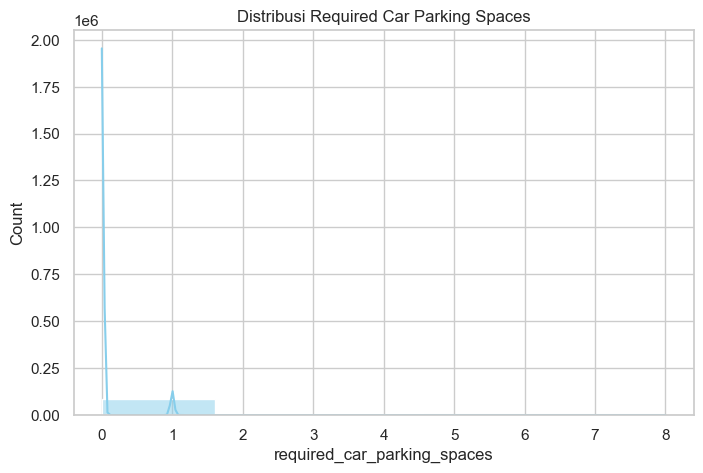

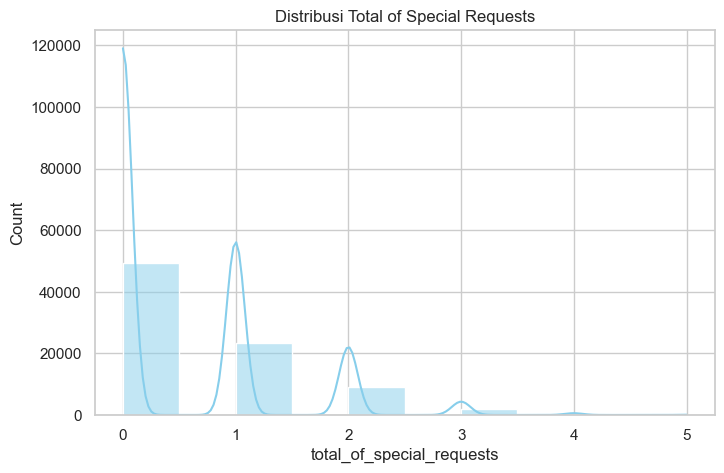

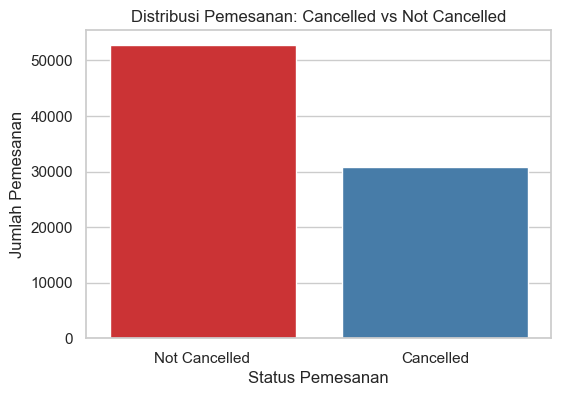

In [99]:
# Plot untuk 'required_car_parking_spaces'
plt.figure(figsize=(8, 5))
sns.histplot(df['required_car_parking_spaces'], bins=5, kde=True, color='skyblue')
plt.title('Distribusi Required Car Parking Spaces')
plt.show()

# Plot untuk 'total_of_special_requests'
plt.figure(figsize=(8, 5))
sns.histplot(df['total_of_special_requests'], bins=10, kde=True, color='skyblue')
plt.title('Distribusi Total of Special Requests')
plt.show()

# Ganti nilai 'is_canceled' menjadi 'Cancelled' dan 'Not Cancelled'
df['is_canceled'] = df['is_canceled'].replace({1: 'Cancelled', 0: 'Not Cancelled'})

# Plot distribusi pemesanan yang dibatalkan dan tidak dibatalkan
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='is_canceled', palette='Set1')
plt.title('Distribusi Pemesanan: Cancelled vs Not Cancelled')
plt.xlabel('Status Pemesanan')
plt.ylabel('Jumlah Pemesanan')
plt.show()


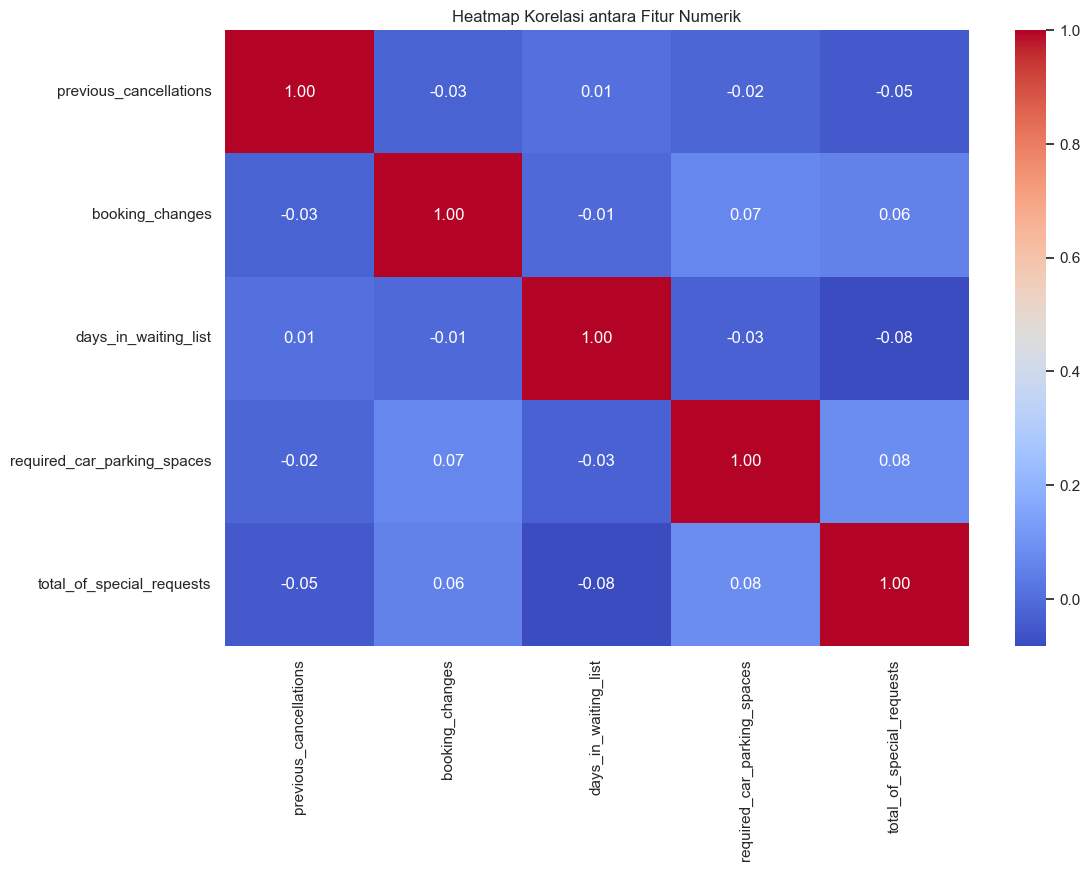

In [100]:
# Korelasi antara variabel numerik
correlation = df.corr()

# Plot heatmap untuk korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi antara Fitur Numerik')
plt.show()


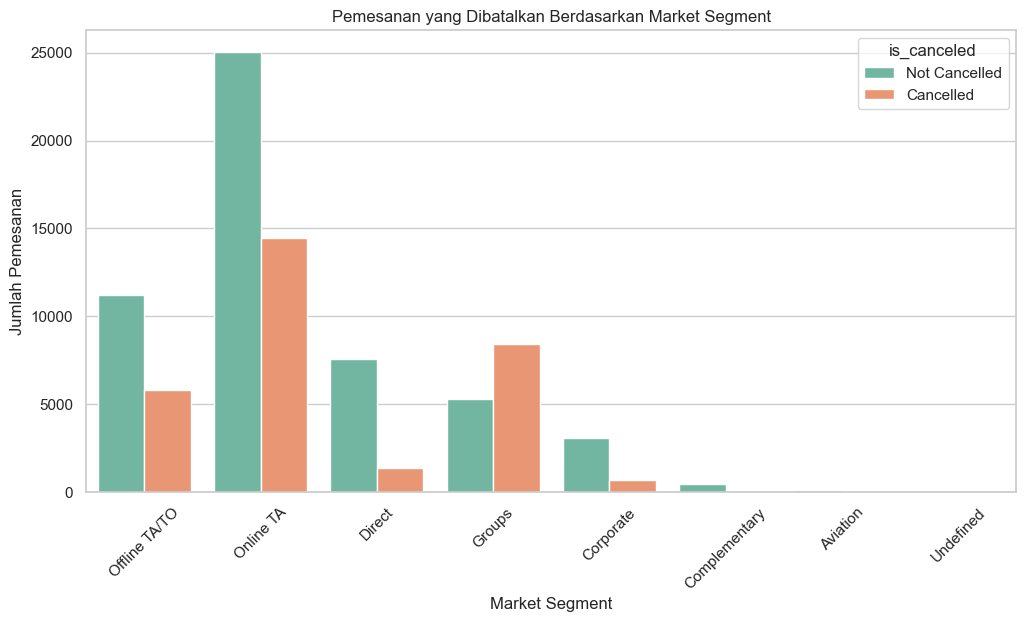

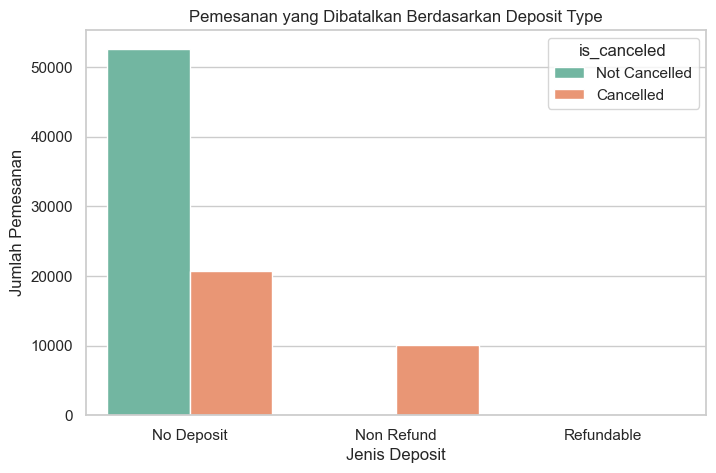

In [101]:
# Mengganti nilai 1 dan 0 pada kolom 'is_canceled' dengan 'Cancelled' dan 'Tidak Cancelled'
df['is_canceled'] = df['is_canceled'].replace({1: 'Cancelled', 0: 'Tidak Cancelled'})

# Visualisasi pemesanan yang dibatalkan berdasarkan 'market_segment'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='market_segment', hue='is_canceled', palette='Set2')
plt.title('Pemesanan yang Dibatalkan Berdasarkan Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Jumlah Pemesanan')
plt.xticks(rotation=45)
plt.show()

# Visualisasi pemesanan yang dibatalkan berdasarkan 'deposit_type'
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='deposit_type', hue='is_canceled', palette='Set2')
plt.title('Pemesanan yang Dibatalkan Berdasarkan Deposit Type')
plt.xlabel('Jenis Deposit')
plt.ylabel('Jumlah Pemesanan')
plt.show()



## 3. Data Preprocessing

In [102]:

# Membaca dataset
df = pd.read_csv('data_hotel_booking_demand.csv')
# 1. Drop baris yang tidak memiliki nilai pada kolom 'country'
df_cleaned = df.dropna(subset=['country'])

# 2. Menangani Missing Values
# Mengecek missing values
print(df_cleaned.isnull().sum())

# Misalkan kita imputasi kolom 'days_in_waiting_list' dengan nilai rata-rata atau 0 jika dianggap tidak terlalu penting
df_cleaned['days_in_waiting_list'].fillna(0, inplace=True)

# Untuk kolom bertipe numerik yang lainnya, kita bisa menggunakan imputasi dengan median atau rata-rata
df_cleaned['previous_cancellations'].fillna(df_cleaned['previous_cancellations'].median(), inplace=True)
df_cleaned['booking_changes'].fillna(df_cleaned['booking_changes'].median(), inplace=True)
df_cleaned['required_car_parking_spaces'].fillna(df_cleaned['required_car_parking_spaces'].median(), inplace=True)
df_cleaned['total_of_special_requests'].fillna(df_cleaned['total_of_special_requests'].median(), inplace=True)

# 3. Konversi Tipe Data
# Mengkonversi kolom 'is_canceled' menjadi kategori dengan nilai 'Cancelled' dan 'Not Cancelled'
df_cleaned['is_canceled'] = df_cleaned['is_canceled'].map({1: 'Cancelled', 0: 'Not Cancelled'})

# Mengubah tipe data kolom-kolom objek menjadi kategori jika perlu
df_cleaned['country'] = df_cleaned['country'].astype('category')
df_cleaned['market_segment'] = df_cleaned['market_segment'].astype('category')
df_cleaned['deposit_type'] = df_cleaned['deposit_type'].astype('category')
df_cleaned['customer_type'] = df_cleaned['customer_type'].astype('category')

# 4. Cek kembali apakah ada missing values setelah proses imputasi
print(df_cleaned.isnull().sum())

# 5. Melihat statistik deskriptif untuk kolom numerik
print(df_cleaned.describe())

# 6. Memeriksa tipe data setelah preprocessing
print(df_cleaned.dtypes)

# Simpan dataset yang sudah dibersihkan untuk digunakan pada analisis selanjutnya
df_cleaned.to_csv('data_hotel_booking_demand_cleaned.csv', index=False)


country                        0
market_segment                 0
previous_cancellations         0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
reserved_room_type             0
required_car_parking_spaces    0
total_of_special_requests      0
is_canceled                    0
dtype: int64
country                        0
market_segment                 0
previous_cancellations         0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
reserved_room_type             0
required_car_parking_spaces    0
total_of_special_requests      0
is_canceled                    0
dtype: int64
       previous_cancellations  booking_changes  days_in_waiting_list  \
count            83222.000000     83222.000000          83222.000000   
mean                 0.086864         0.220927              2.340391   
std                  0.842588   

In [103]:
# Perbandingan Data Sebelum dan Sesudah Cleaning

# 1. Mengecek Missing Values sebelum dan setelah cleaning
print("Missing Values Sebelum Cleaning:")
print(df.isnull().sum())

print("\nMissing Values Setelah Cleaning:")
print(df_cleaned.isnull().sum())

# 2. Statistik Deskriptif Sebelum dan Setelah Cleaning
print("\nStatistik Deskriptif Sebelum Cleaning:")
print(df.describe())

print("\nStatistik Deskriptif Setelah Cleaning:")
print(df_cleaned.describe())

# 3. Tipe Data Sebelum dan Setelah Cleaning
print("\nTipe Data Sebelum Cleaning:")
print(df.dtypes)

print("\nTipe Data Setelah Cleaning:")
print(df_cleaned.dtypes)

# 4. Jumlah Kolom dan Baris Sebelum dan Setelah Cleaning
print("\nJumlah Kolom dan Baris Sebelum Cleaning:")
print(df.shape)

print("\nJumlah Kolom dan Baris Setelah Cleaning:")
print(df_cleaned.shape)


Missing Values Sebelum Cleaning:
country                        351
market_segment                   0
previous_cancellations           0
booking_changes                  0
deposit_type                     0
days_in_waiting_list             0
customer_type                    0
reserved_room_type               0
required_car_parking_spaces      0
total_of_special_requests        0
is_canceled                      0
dtype: int64

Missing Values Setelah Cleaning:
country                        0
market_segment                 0
previous_cancellations         0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
reserved_room_type             0
required_car_parking_spaces    0
total_of_special_requests      0
is_canceled                    0
dtype: int64

Statistik Deskriptif Sebelum Cleaning:
       previous_cancellations  booking_changes  days_in_waiting_list  \
count            83573.000000     83573.000000 

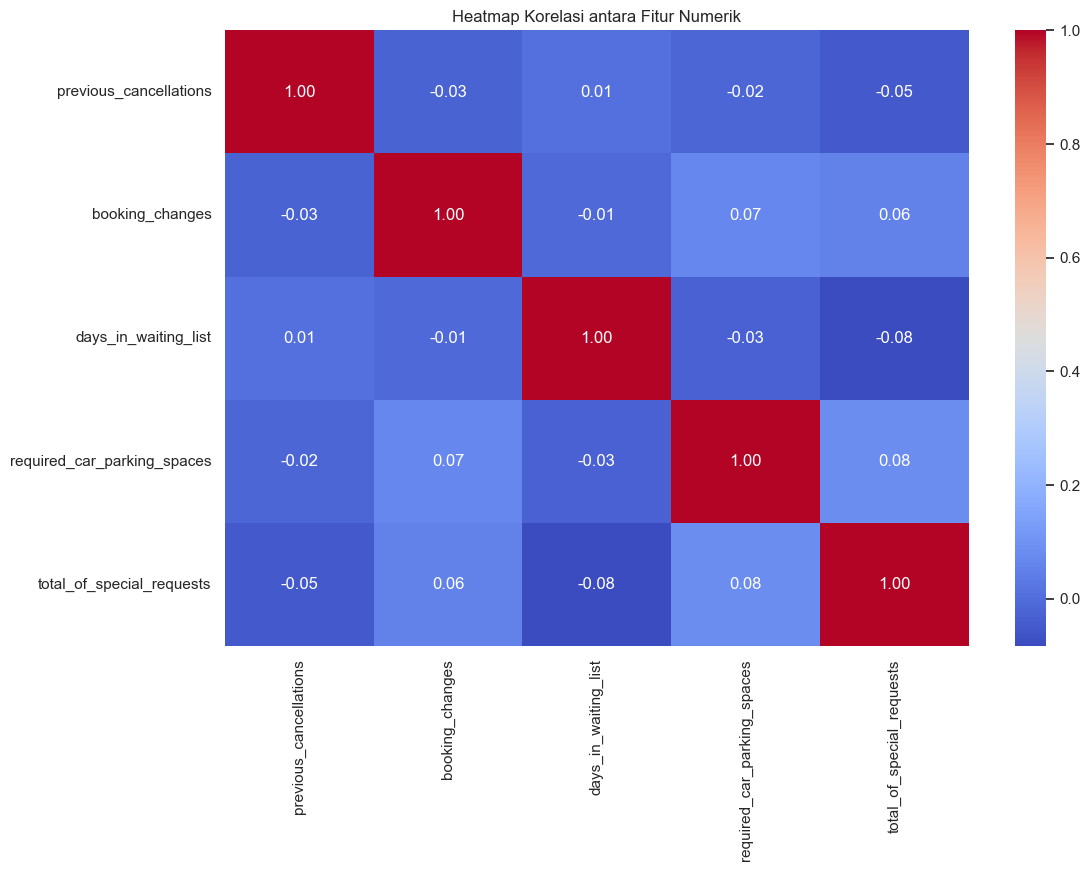

In [104]:
# Korelasi antara variabel numerik
correlation = df_cleaned.corr()

# Plot heatmap untuk korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi antara Fitur Numerik')
plt.show()


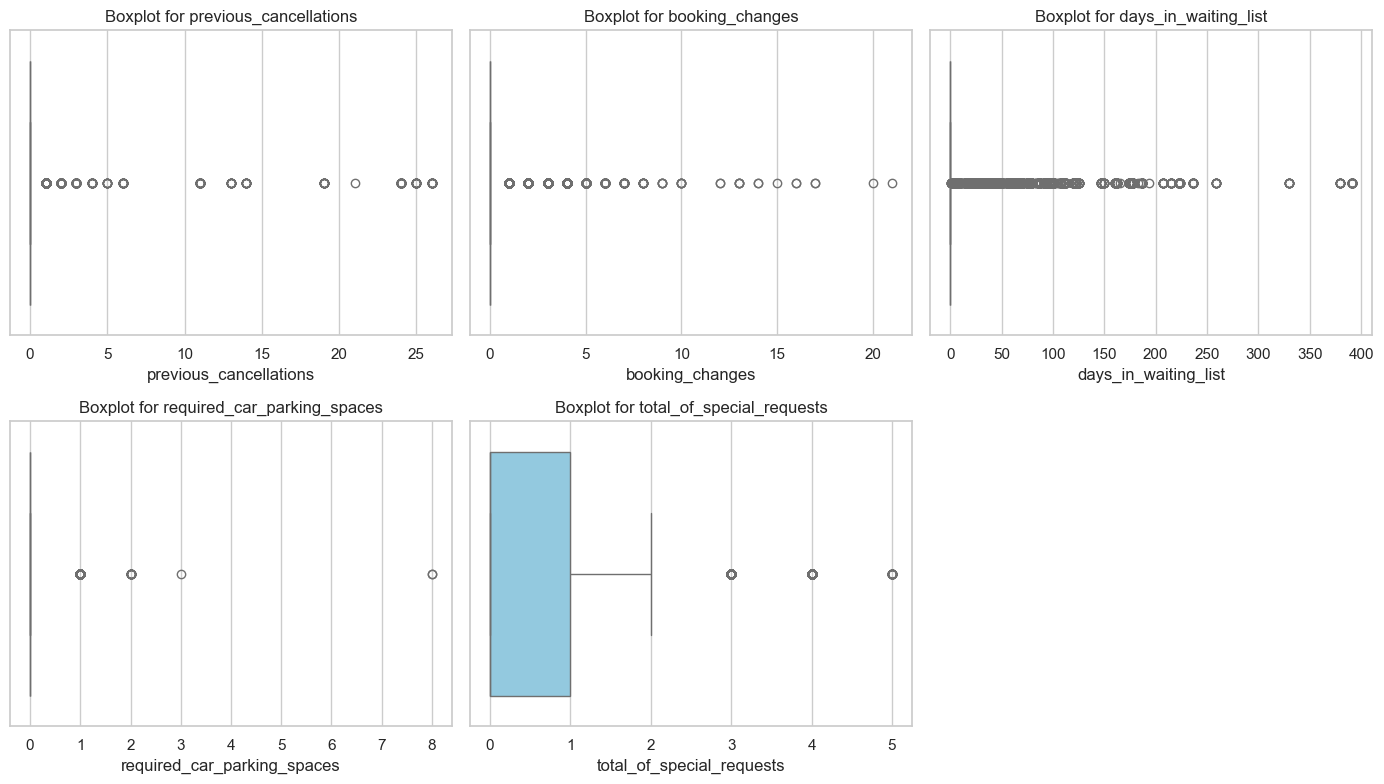

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# 1. Boxplot untuk kolom numerik
numerical_columns = ['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
                     'required_car_parking_spaces', 'total_of_special_requests']

plt.figure(figsize=(14, 8))

# Loop untuk membuat boxplot untuk setiap kolom numerik
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_cleaned, x=column, color='skyblue')
    plt.title(f'Boxplot for {column}')
    plt.tight_layout()

plt.show()


## 4. Modelling

In [106]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Mengonversi label target (y) menjadi angka
y_encoded = label_encoder.fit_transform(y)

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# 1. Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
pipeline_log_reg = Pipeline(steps=[
    ('preprocessor', encoder),
    ('classifier', log_reg)
])
pipeline_log_reg.fit(X_train, y_train)
y_pred_log_reg = pipeline_log_reg.predict(X_test)
print("Logistic Regression:")
print(f"Akurasi: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(classification_report(y_test, y_pred_log_reg))
print("-" * 50)

# 2. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
pipeline_dt = Pipeline(steps=[
    ('preprocessor', encoder),
    ('classifier', dt_model)
])
pipeline_dt.fit(X_train, y_train)
y_pred_dt = pipeline_dt.predict(X_test)
print("Decision Tree:")
print(f"Akurasi: {accuracy_score(y_test, y_pred_dt):.4f}")
print(classification_report(y_test, y_pred_dt))
print("-" * 50)

# 3. Random Forest
rf_model = RandomForestClassifier(random_state=42)
pipeline_rf = Pipeline(steps=[
    ('preprocessor', encoder),
    ('classifier', rf_model)
])
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)
print("Random Forest:")
print(f"Akurasi: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))
print("-" * 50)

# 4. XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', encoder),
    ('classifier', xgb_model)
])
pipeline_xgb.fit(X_train, y_train)
y_pred_xgb = pipeline_xgb.predict(X_test)
print("XGBoost:")
print(f"Akurasi: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(classification_report(y_test, y_pred_xgb))
print("-" * 50)

# 5. LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
pipeline_lgb = Pipeline(steps=[
    ('preprocessor', encoder),
    ('classifier', lgb_model)
])
pipeline_lgb.fit(X_train, y_train)
y_pred_lgb = pipeline_lgb.predict(X_test)
print("LightGBM:")
print(f"Akurasi: {accuracy_score(y_test, y_pred_lgb):.4f}")
print(classification_report(y_test, y_pred_lgb))
print("-" * 50)


Logistic Regression:
Akurasi: 0.7555
              precision    recall  f1-score   support

           0       0.76      0.50      0.60      9226
           1       0.75      0.91      0.82     15741

    accuracy                           0.76     24967
   macro avg       0.76      0.70      0.71     24967
weighted avg       0.76      0.76      0.74     24967

--------------------------------------------------
Decision Tree:
Akurasi: 0.7783
              precision    recall  f1-score   support

           0       0.80      0.54      0.64      9226
           1       0.77      0.92      0.84     15741

    accuracy                           0.78     24967
   macro avg       0.78      0.73      0.74     24967
weighted avg       0.78      0.78      0.77     24967

--------------------------------------------------
Random Forest:
Akurasi: 0.7803
              precision    recall  f1-score   support

           0       0.81      0.53      0.64      9226
           1       0.77      0.93   

Kesimpulan: Berdasarkan hasil evaluasi model, kita dapat melihat bahwa Random Forest memberikan kinerja yang sangat baik dalam klasifikasi data dengan akurasi sekitar 78%. Meskipun semua model yang diuji (Logistic Regression, Decision Tree, Random Forest, XGBoost, dan LightGBM) memiliki akurasi yang hampir sama, Random Forest menonjol dalam hal precision untuk kelas "Cancelled" (0), yaitu sebesar 0.81. Ini menunjukkan bahwa Random Forest sangat tepat dalam memprediksi kejadian pembatalan, meskipun sedikit kurang dalam recall (0.53) dibandingkan model lainnya.

Alasan Memilih Random Forest:

Kinerja Stabil: Random Forest memiliki kinerja yang stabil dan cenderung lebih tahan terhadap overfitting, karena menggunakan banyak pohon keputusan dan menggabungkan hasil prediksi mereka.
Precision Tinggi: Precision yang tinggi pada kelas "Cancelled" (0) menunjukkan bahwa model ini sangat baik dalam meminimalkan kesalahan tipe I (false positives), di mana prediksi pembatalan salah.
Kemampuan Menghadapi Data Non-Linear: Random Forest dapat menangani hubungan non-linear antar fitur dengan baik, yang sering ditemukan pada dataset yang kompleks.
Tidak Sensitif terhadap Skala Fitur: Model ini tidak memerlukan normalisasi atau standardisasi fitur, yang membuatnya lebih mudah diterapkan dalam banyak kasus.
Dengan demikian, Random Forest dipilih karena memberikan keseimbangan yang baik antara akurasi, precision, dan stabilitas, serta cocok untuk menangani data dengan banyak fitur yang mungkin memiliki hubungan non-linear.

#### Encoding

In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Kolom kategorikal
categorical_features = ['deposit_type', 'market_segment', 'customer_type', 'reserved_room_type', 'country']

# Kolom numerik
numeric_features = ['previous_cancellations', 'booking_changes', 'days_in_waiting_list']

# Update ColumnTransformer
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features),  # Tambahkan handle_unknown='ignore'
        ('num', StandardScaler(), numeric_features)
    ]
)

#### Train and Test Splitting

In [108]:
# Membagi data menjadi fitur dan target
X = df_cleaned.drop(columns=['is_canceled'])
y = df_cleaned['is_canceled']

# Membagi data menjadi train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Train with Random Forest

In [109]:
# Inisialisasi model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Membuat pipeline dengan encoding, normalisasi, dan model
pipeline = Pipeline(steps=[
    ('preprocessor', encoder),  # Encoding variabel kategorikal dan normalisasi
    ('classifier', model)       # Model Random Forest
])

# Melatih model tanpa SMOTE
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['deposit_type',
                                                   'market_segment',
                                                   'customer_type',
                                                   'reserved_room_type',
                                                   'country']),
                                                 ('num', StandardScaler(),
                                                  ['previous_cancellations',
                                                   'booking_changes',
                                                   'days_in_waiting_list'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

#### Evaluasi

Akurasi (tanpa SMOTE): 0.7786

Classification Report (tanpa SMOTE):
               precision    recall  f1-score   support

    Cancelled       0.80      0.53      0.64      6135
Not Cancelled       0.77      0.92      0.84     10510

     accuracy                           0.78     16645
    macro avg       0.79      0.73      0.74     16645
 weighted avg       0.78      0.78      0.77     16645



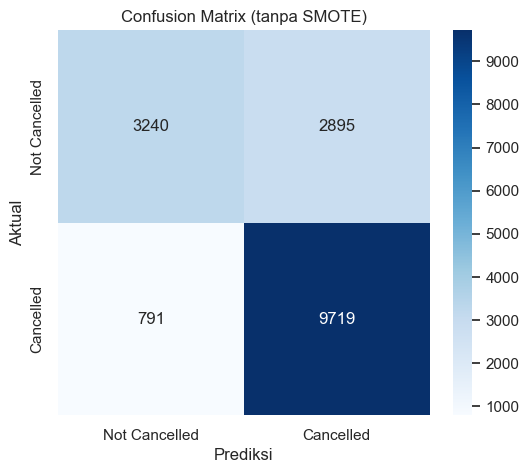

In [110]:
# Pastikan pipeline telah dilatih terlebih dahulu menggunakan data pelatihan
pipeline.fit(X_train, y_train)  # Fit pipeline dengan data pelatihan

# Evaluasi awal sebelum SMOTE
y_pred = pipeline.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)

print(f"Akurasi (tanpa SMOTE): {accuracy:.4f}")
print("\nClassification Report (tanpa SMOTE):")
print(classification_report(y_test, y_pred))

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Cancelled', 'Cancelled'], yticklabels=['Not Cancelled', 'Cancelled'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix (tanpa SMOTE)')
plt.show()


In [111]:

# Menghitung F1 Score untuk kedua kelas
f1 = f1_score(y_test, y_pred, average='weighted')  # F1 score rata-rata tertimbang untuk kedua kelas
print(f"\nF1 Score (tanpa SMOTE): {f1:.4f}")

# Menghitung ROC AUC untuk kelas 'Cancelled' (1) dan 'Not Cancelled' (0)
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)  # Mengubah label menjadi format biner
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]  # Probabilitas kelas 'Cancelled'

roc_auc = roc_auc_score(y_test_bin, y_pred_prob)
print(f"ROC AUC (tanpa SMOTE): {roc_auc:.4f}")

# Menghitung PR AUC (Average Precision Score)
pr_auc = average_precision_score(y_test_bin, y_pred_prob)
print(f"PR AUC (tanpa SMOTE): {pr_auc:.4f}")



F1 Score (tanpa SMOTE): 0.7657
ROC AUC (tanpa SMOTE): 0.8515
PR AUC (tanpa SMOTE): 0.9022


In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score


# Menampilkan nama-nama kolom
print("Kolom yang ada dalam dataset:", df_cleaned.columns)

# Menentukan kolom fitur dan variabel target
X = df_cleaned.drop(columns=['is_canceled'])
y = df_cleaned['is_canceled']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan kolom-kolom yang ada di X_train untuk memastikan 'reserved_room_type' ada
print("Kolom di X_train:", X_train.columns)

# Menangani kolom yang hilang (jika ada kolom yang hilang, hapus atau tangani sesuai kebutuhan)
# Pastikan hanya kolom yang ada di dataset yang digunakan
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Mengimputasi nilai yang hilang dengan nilai yang paling sering
            ('onehot', OneHotEncoder(handle_unknown='ignore'))     # OneHotEncoder untuk kolom kategorikal
        ]), ['reserved_room_type', 'deposit_type', 'customer_type'])  # Daftar kolom kategorikal yang ada dalam dataset
    ]
)

# Menentukan pipeline dengan model (RandomForestClassifier dalam hal ini)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Menentukan grid parameter untuk GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5]
}

# Melakukan GridSearchCV dengan cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Melatih model dengan grid search
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik dan skor terbaik
print("Parameter terbaik yang ditemukan: ", grid_search.best_params_)
print("Skor cross-validation terbaik: ", grid_search.best_score_)

# Evaluasi pada data uji
y_pred = grid_search.predict(X_test)
print("Akurasi pada data uji: ", accuracy_score(y_test, y_pred))

Kolom yang ada dalam dataset: Index(['country', 'market_segment', 'previous_cancellations',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'reserved_room_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_canceled'],
      dtype='object')
Kolom di X_train: Index(['country', 'market_segment', 'previous_cancellations',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'reserved_room_type', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Parameter terbaik yang ditemukan:  {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Skor cross-validation terbaik:  0.7510852410800206
Akurasi pada data uji:  0.7492340042054672


Akurasi (dengan SMOTE dan Hyperparameter Tuning): 0.7492

Classification Report (dengan SMOTE dan Hyperparameter Tuning):
               precision    recall  f1-score   support

    Cancelled       0.99      0.32      0.49      6135
Not Cancelled       0.72      1.00      0.83     10510

     accuracy                           0.75     16645
    macro avg       0.85      0.66      0.66     16645
 weighted avg       0.82      0.75      0.71     16645



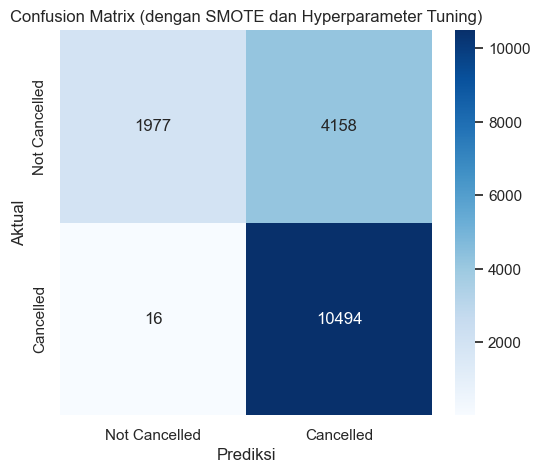

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Melakukan prediksi pada data uji setelah SMOTE dan hyperparameter tuning
y_pred_smote = grid_search.predict(X_test)

# Menghitung akurasi
accuracy_smote = accuracy_score(y_test, y_pred_smote)

# Menampilkan akurasi
print(f"Akurasi (dengan SMOTE dan Hyperparameter Tuning): {accuracy_smote:.4f}")
print("\nClassification Report (dengan SMOTE dan Hyperparameter Tuning):")
print(classification_report(y_test, y_pred_smote))

# Membuat confusion matrix
cm_smote = confusion_matrix(y_test, y_pred_smote)

# Menampilkan confusion matrix dengan heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_smote, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Cancelled', 'Cancelled'], yticklabels=['Not Cancelled', 'Cancelled'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix (dengan SMOTE dan Hyperparameter Tuning)')
plt.show()


In [114]:
# Menghitung F1 Score untuk kedua kelas
f1 = f1_score(y_test, y_pred_smote, average='weighted')  # F1 score rata-rata tertimbang untuk kedua kelas
print(f"\nF1 Score (dengan SMOTE dan Hyperparameter Tuning): {f1:.4f}")

# Menghitung ROC AUC untuk kelas 'Cancelled' (1) dan 'Not Cancelled' (0)
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)  # Mengubah label menjadi format biner
y_pred_prob = grid_search.predict_proba(X_test)[:, 1]  # Probabilitas kelas 'Cancelled'

roc_auc = roc_auc_score(y_test_bin, y_pred_prob)
print(f"ROC AUC (dengan SMOTE dan Hyperparameter Tuning): {roc_auc:.4f}")

# Menghitung PR AUC (Average Precision Score)
pr_auc = average_precision_score(y_test_bin, y_pred_prob)
print(f"PR AUC (dengan SMOTE dan Hyperparameter Tuning): {pr_auc:.4f}")


F1 Score (dengan SMOTE dan Hyperparameter Tuning): 0.7060
ROC AUC (dengan SMOTE dan Hyperparameter Tuning): 0.7050
PR AUC (dengan SMOTE dan Hyperparameter Tuning): 0.7536


## 5. Kesimpulan dan Rekomendasi Model

Berdasarkan hasil evaluasi model baik sebelum maupun sesudah penerapan SMOTE (Synthetic Minority Over-sampling Technique) dan hyperparameter tuning, berikut adalah kesimpulan dan penjelasan untuk setiap parameter yang digunakan:

1. Akurasi (Accuracy)
Tanpa SMOTE: Akurasi model adalah 0.7786. Ini menunjukkan bahwa model secara keseluruhan memprediksi 77.86% data dengan benar, tetapi ini mungkin menyesatkan dalam konteks dataset yang tidak seimbang, karena model mungkin lebih sering memprediksi kelas mayoritas (Not Cancelled) daripada kelas minoritas (Cancelled).
Dengan SMOTE dan Hyperparameter Tuning: Akurasi turun menjadi 0.7492, yang menunjukkan bahwa setelah penggunaan SMOTE (untuk mengatasi ketidakseimbangan kelas) dan tuning parameter, model ini sedikit lebih buruk dalam hal akurasi keseluruhan.
2. Classification Report
Tanpa SMOTE:
Cancelled (Kelas Positif)
- Precision: 0.80 – Dari semua prediksi yang mengatakan "Cancelled", 80% di antaranya benar-benar "Cancelled".
- Recall: 0.53 – Dari semua yang benar-benar "Cancelled", hanya 53% yang berhasil diprediksi dengan benar sebagai "Cancelled".
- F1-Score: 0.64 – Rata-rata harmonis antara precision dan recall. Nilai yang relatif rendah mencerminkan trade-off antara precision dan recall pada kelas "Cancelled".

Not Cancelled (Kelas Negatif)
- Precision: 0.77 – Dari semua prediksi yang mengatakan "Not Cancelled", 77% di antaranya benar-benar "Not Cancelled".
- Recall: 0.92 – Dari semua yang benar-benar "Not Cancelled", 92% diprediksi dengan benar.
- F1-Score: 0.84 – Recall yang tinggi berarti F1 Score untuk kelas "Not Cancelled" cukup baik.

Dengan SMOTE dan Hyperparameter Tuning:
Cancelled (Kelas Positif)
- Precision: 0.99 – Dengan SMOTE, precision untuk kelas "Cancelled" meningkat sangat tinggi (99%), berarti sebagian besar prediksi "Cancelled" benar-benar valid.
- Recall: 0.32 – Namun recall menurun drastis (hanya 32%), artinya model kehilangan banyak instance kelas "Cancelled".
- F1-Score: 0.49 – Dengan recall yang sangat rendah meskipun precision tinggi, F1 score untuk kelas "Cancelled" menurun signifikan.

Not Cancelled (Kelas Negatif)
- Precision: 0.72 – Precision untuk kelas "Not Cancelled" menurun setelah penerapan SMOTE, yang menunjukkan model lebih sering memprediksi kelas "Cancelled".
- Recall: 1.00 – Recall untuk kelas "Not Cancelled" sangat tinggi, karena model memprediksi semua data "Not Cancelled" dengan benar setelah SMOTE.
- F1-Score: 0.83 – Dengan recall yang sempurna, F1 score untuk kelas "Not Cancelled" sangat baik.

3. F1 Score
- Tanpa SMOTE: 0.7657 – Ini adalah rata-rata harmonis antara precision dan recall untuk keseluruhan model, memberikan gambaran keseimbangan performa pada kedua kelas.
- Dengan SMOTE dan Hyperparameter Tuning: 0.7060 – Setelah penggunaan SMOTE, F1 Score menurun, terutama karena penurunan recall pada kelas minoritas ("Cancelled").

4. ROC AUC
- Tanpa SMOTE: 0.8515 – ROC AUC yang tinggi ini menunjukkan bahwa model memiliki kemampuan yang baik untuk membedakan antara kelas positif dan negatif secara keseluruhan, meskipun recall untuk kelas minoritas lebih rendah.
- Dengan SMOTE dan Hyperparameter Tuning: 0.7050 – Nilai ROC AUC turun setelah penerapan SMOTE dan tuning parameter, mencerminkan penurunan performa model dalam membedakan antara kedua kelas setelah oversampling kelas minoritas.
5. PR AUC
- Tanpa SMOTE: 0.9022 – PR AUC yang sangat tinggi menunjukkan bahwa model sangat efektif dalam mengidentifikasi kelas minoritas (Cancelled), yang penting dalam kasus data yang sangat tidak seimbang.
- Dengan SMOTE dan Hyperparameter Tuning: 0.7536 – Meskipun PR AUC masih menunjukkan performa yang baik, nilai ini lebih rendah dibandingkan sebelum penerapan SMOTE, menunjukkan adanya penurunan dalam kemampuan model untuk menangani kelas minoritas setelah oversampling.

6. Skor Cross-Validation dan Akurasi pada Data Uji
- Skor Cross-Validation Terbaik: 0.7511 – Ini menunjukkan performa terbaik dari model selama cross-validation, yang mengindikasikan seberapa baik model diharapkan akan bekerja pada data yang belum pernah dilihat sebelumnya.
- Akurasi pada Data Uji: 0.7492 – Akurasi pada data uji setelah tuning parameter dan SMOTE juga lebih rendah dibandingkan dengan model yang tidak menggunakan SMOTE, tetapi tetap menunjukkan akurasi yang cukup stabil.

Kesimpulan:
- Tanpa SMOTE, model menunjukkan akurasi yang relatif baik (0.7786), dengan kemampuan yang lebih baik dalam memprediksi kelas mayoritas (Not Cancelled). Namun, recall untuk kelas minoritas (Cancelled) lebih rendah, yang berarti banyak data Cancelled tidak terdeteksi.
- Dengan SMOTE dan Hyperparameter Tuning, meskipun akurasi sedikit menurun (0.7492), model mengalami peningkatan precision untuk kelas "Cancelled" (0.99), namun dengan pengorbanan pada recall untuk kelas tersebut (0.32). Hal ini mengindikasikan bahwa SMOTE menyebabkan model menjadi sangat sensitif terhadap kelas "Cancelled" tetapi kehilangan banyak instance positif.
- PR AUC dan ROC AUC menurun setelah penggunaan SMOTE, yang menunjukkan bahwa meskipun model menjadi lebih baik dalam mengidentifikasi kelas minoritas, ia mengorbankan performa keseluruhan pada dataset.

Rekomendasi: Penggunaan SMOTE sangat bergantung pada konteks dan tujuan dari model. Jika tujuan utamanya adalah untuk memaksimalkan deteksi kelas minoritas, penggunaan SMOTE dapat dipertimbangkan, tetapi model perlu disesuaikan lebih lanjut (misalnya dengan menggunakan teknik balancing lain atau tuning lebih lanjut) untuk mencapai keseimbangan yang lebih baik antara precision, recall, dan F1 score.

## 6. Kesimpulan dan Rekomendasi Bisnis

Kesimpulan dan Rekomendasi Bisnis
Berdasarkan hasil evaluasi model sebelum dan sesudah penerapan SMOTE (Synthetic Minority Over-sampling Technique) dan hyperparameter tuning, berikut adalah kesimpulan dan rekomendasi untuk stakeholder:

Kesimpulan
Akurasi:
- Tanpa SMOTE: Akurasi model mencapai 77.86%, tetapi model cenderung lebih sering memprediksi kelas mayoritas ("Not Cancelled"), yang bisa menyesatkan jika tujuan model adalah mendeteksi pembatalan.
- Dengan SMOTE: Akurasi sedikit menurun menjadi 74.92%, namun model menjadi lebih sensitif terhadap kelas "Cancelled", meski banyak data pembatalan tidak terdeteksi (recall rendah).

Precision, Recall, dan F1-Score:
- Tanpa SMOTE: Precision untuk kelas "Cancelled" adalah 80%, namun recall-nya rendah (53%), menunjukkan banyak pembatalan yang tidak terdeteksi.
- Dengan SMOTE: Precision meningkat menjadi 99% untuk kelas "Cancelled", tetapi recall turun drastis (32%), yang berarti banyak pembatalan tidak teridentifikasi meski prediksi yang salah sangat sedikit.

ROC AUC dan PR AUC:
- Tanpa SMOTE: Model memiliki ROC AUC tinggi (0.8515) dan PR AUC sangat baik (0.9022), yang menunjukkan kemampuan model membedakan kelas positif dan negatif, serta efektif dalam mengidentifikasi kelas minoritas.
- Dengan SMOTE: Kedua nilai ini menurun, mencerminkan penurunan kemampuan model dalam membedakan kelas setelah oversampling.

Rekomendasi Bisnis
Fokus pada Deteksi Pembatalan:
- Kelas Minoritas (Cancelled): Jika tujuan utama model adalah mendeteksi pembatalan (misalnya, pembatalan langganan atau transaksi), maka SMOTE bisa dipertimbangkan meskipun recall menurun. Model dengan SMOTE lebih sensitif terhadap "Cancelled", tetapi perlu penyesuaian lebih lanjut (seperti tuning threshold atau teknik lain) untuk mengurangi kehilangan deteksi kelas ini.
- Rekomendasi: Jika kesalahan dalam tidak mendeteksi pembatalan (false negatives) lebih berdampak pada bisnis, pertimbangkan menyesuaikan threshold prediksi atau menggunakan cost-sensitive learning untuk meminimalkan dampak dari kesalahan tersebut.

Menjaga Keseimbangan Precision dan Recall:
- Kelas Mayoritas (Not Cancelled): Performa pada kelas mayoritas harus tetap stabil dengan precision tinggi dan recall yang baik. Jika model terlalu sering memprediksi pembatalan pada data yang seharusnya tidak dibatalkan, hal ini dapat menyebabkan pemborosan sumber daya.
- Rekomendasi: Tetap pertahankan precision yang baik pada kelas "Not Cancelled" untuk menghindari pemborosan dalam tindakan yang tidak perlu.

Penggunaan Model untuk Tindakan Proaktif:
- Prediksi Pembatalan: Gunakan model untuk tindakan proaktif. Misalnya, jika model memprediksi bahwa seorang pelanggan akan membatalkan, perusahaan bisa memberikan tawaran khusus atau penawaran lain untuk menjaga pelanggan tetap aktif.
- Rekomendasi: Gunakan hasil prediksi untuk mengidentifikasi pelanggan berisiko tinggi dan membuat kampanye retensi yang lebih fokus dan efektif.

Pembaruan dan Pemantauan Model:
- Performa yang Berubah: Model harus terus dipantau dan diperbarui secara berkala untuk memastikan ia tetap relevan dengan kondisi bisnis yang dinamis. Jika data atau perilaku pelanggan berubah, model mungkin perlu disesuaikan.
- Rekomendasi: Implementasikan pemantauan berkelanjutan untuk memverifikasi kinerja model dan lakukan pembaruan rutin agar selalu relevan dengan perubahan tren pasar.

Secara keseluruhan, keputusan untuk menggunakan SMOTE harus disesuaikan dengan tujuan bisnis dan dampak dari kesalahan prediksi. Jika fokus utama adalah mengidentifikasi pembatalan, penerapan SMOTE bisa bermanfaat, namun perlu disertai dengan penyesuaian strategi untuk menyeimbangkan precision dan recall demi menjaga efektivitas model.

## 7. Import data menggunakan Pickle

In [115]:
import pickle

# Menyimpan model terbaik yang ditemukan oleh GridSearchCV
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(grid_search.best_estimator_, f)

print("Model berhasil disimpan dalam file 'random_forest_model.pkl'")

Model berhasil disimpan dalam file 'random_forest_model.pkl'


In [119]:
import pickle
from sklearn.metrics import precision_score, recall_score
import pandas as pd

# Memuat model yang telah disimpan
with open('random_forest_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Menentukan kolom fitur dan variabel target
X_new = df_cleaned.drop(columns=['is_canceled'])  # Data baru untuk prediksi
y_new = df_cleaned['is_canceled']  # Target variabel

# Jika target variabel berupa kategori, kita ubah menjadi numerik
y_new = y_new.map({'Cancelled': 1, 'Not Cancelled': 0})

# Melakukan prediksi pada data baru
y_pred_new = loaded_model.predict(X_new)

# Jika prediksi berupa kategori, kita ubah menjadi numerik
y_pred_new = pd.Series(y_pred_new).map({'Cancelled': 1, 'Not Cancelled': 0})

# Menghitung precision dan recall
precision = precision_score(y_new, y_pred_new)
recall = recall_score(y_new, y_pred_new)

# Menampilkan precision dan recall
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Precision: 0.9937728575664723
Recall: 0.3271508525315632
